<img src="./unal.png" align=left width="150" height="150"></img>



$\,$
---

<h2 align="center"> "Purchase" : DATOS DE JUGOS DE NARANJA.</h2>
<h3 align="center">Métodos ensamble de clasificación. Arbol de clasificación simple</h3>


$\;$

---

Los datos contienen 1070 compras donde el cliente compró Citrus Hill o Minute Maid Orange Juice. Se registran una serie de características del cliente y del producto. Es un marco de datos con 1070 observaciones sobre las siguientes 18 variables.

* Purchase: Un factor con niveles CHy MM que indica si el cliente compró Citrus Hill o Minuto jugo de naranja de la criada

* WeekofPurchase: Semana de compra

* StoreID: ID de tienda

* PriceCH: Precio cobrado por CH

* PriceMM: Precio cobrado por MM

* DiscCH: Descuento ofrecido por CH

* DiscMM: Descuento ofrecido por MM

* SpecialCH: Indicador de especial en CH

* SpecialMM: Indicador de especial en MM

* LoyalCH: Fidelización de marca del cliente para CH

* SalePriceMM: Precio de venta para MM

* SalePriceCH: Precio de venta para CH

* PriceDiff: Precio de venta de MM menos precio de venta de CH

* Store7: Un factor con niveles Noy Yes que indica si la venta se encuentra en tienda 7

* PctDiscMM: Porcentaje de descuento para MM

* PctDiscCH: Porcentaje de descuento para CH

* ListPriceDiff: Precio de lista de MM menos precio de lista de CH

* STORE: ¿En cuál de las 5 tiendas posibles tuvo lugar la venta?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn import tree, preprocessing, model_selection, ensemble
from sklearn.tree import export_graphviz 
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, mean_squared_error, make_scorer, plot_confusion_matrix, classification_report
from sklearn import metrics

In [21]:
url='https://vincentarelbundock.github.io/Rdatasets/csv/ISLR/OJ.csv'

In [22]:
# Importamos el set de datos OJ desde un CSV
datos_oj = pd.read_csv(url)
datos_oj=datos_oj.iloc[:, 1:19]
print('Filas:', datos_oj.shape[0], 'Variables:', datos_oj.shape[1])
datos_oj.head()

Filas: 1070 Variables: 18


,Purchase,WeekofPurchase,StoreID,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,SalePriceMM,SalePriceCH,PriceDiff,Store7,PctDiscMM,PctDiscCH,ListPriceDiff,STORE
0,CH,237,1,1.75,1.99,0.00,0.0,0,0,0.500000,1.99,1.75,0.24,No,0.000000,0.000000,0.24,1
1,CH,239,1,1.75,1.99,0.00,0.3,0,1,0.600000,1.69,1.75,-0.06,No,0.150754,0.000000,0.24,1
2,CH,245,1,1.86,2.09,0.17,0.0,0,0,0.680000,2.09,1.69,0.40,No,0.000000,0.091398,0.23,1
3,MM,227,1,1.69,1.69,0.00,0.0,0,0,0.400000,1.69,1.69,0.00,No,0.000000,0.000000,0.00,1
4,CH,228,7,1.69,1.69,0.00,0.0,0,0,0.956535,1.69,1.69,0.00,Yes,0.000000,0.000000,0.00,0


In [23]:
datos_oj.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1070 entries, 0 to 1069
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Purchase        1070 non-null   object 
 1   WeekofPurchase  1070 non-null   int64  
 2   StoreID         1070 non-null   int64  
 3   PriceCH         1070 non-null   float64
 4   PriceMM         1070 non-null   float64
 5   DiscCH          1070 non-null   float64
 6   DiscMM          1070 non-null   float64
 7   SpecialCH       1070 non-null   int64  
 8   SpecialMM       1070 non-null   int64  
 9   LoyalCH         1070 non-null   float64
 10  SalePriceMM     1070 non-null   float64
 11  SalePriceCH     1070 non-null   float64
 12  PriceDiff       1070 non-null   float64
 13  Store7          1070 non-null   object 
 14  PctDiscMM       1070 non-null   float64
 15  PctDiscCH       1070 non-null   float64
 16  ListPriceDiff   1070 non-null   float64
 17  STORE           1070 non-null   i

In [24]:
datos_oj.describe()

,WeekofPurchase,StoreID,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,SalePriceMM,SalePriceCH,PriceDiff,PctDiscMM,PctDiscCH,ListPriceDiff,STORE
count,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000
mean,254.381308,3.959813,1.867421,2.085411,0.051860,0.123364,0.147664,0.161682,0.565782,1.962047,1.815561,0.146486,0.059298,0.027314,0.217991,1.630841
std,15.558286,2.308984,0.101970,0.134386,0.117474,0.213834,0.354932,0.368331,0.307843,0.252697,0.143384,0.271563,0.101760,0.062232,0.107535,1.430387
min,227.000000,1.000000,1.690000,1.690000,0.000000,0.000000,0.000000,0.000000,0.000011,1.190000,1.390000,-0.670000,0.000000,0.000000,0.000000,0.000000
25%,240.000000,2.000000,1.790000,1.990000,0.000000,0.000000,0.000000,0.000000,0.325257,1.690000,1.750000,0.000000,0.000000,0.000000,0.140000,0.000000
50%,257.000000,3.000000,1.860000,2.090000,0.000000,0.000000,0.000000,0.000000,0.600000,2.090000,1.860000,0.230000,0.000000,0.000000,0.240000,2.000000
75%,268.000000,7.000000,1.990000,2.180000,0.000000,0.230000,0.000000,0.000000,0.850873,2.130000,1.890000,0.320000,0.112676,0.000000,0.300000,3.000000
max,278.000000,7.000000,2.090000,2.290000,0.500000,0.800000,1.000000,1.000000,0.999947,2.290000,2.090000,0.640000,0.402010,0.252688,0.440000,4.000000


### Distribución de la variable respuesta "Purchase"

<AxesSubplot:>

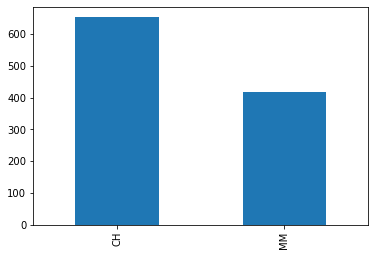

In [25]:
datos_oj['Purchase'].value_counts().plot(kind='bar')

In [26]:
# Numero y porcentaje de observaciones por clase
print(datos_oj.Purchase.value_counts())
datos_oj.Purchase.value_counts(normalize=True)*100

CH    653
MM    417
Name: Purchase, dtype: int64


CH    61.028037
MM    38.971963
Name: Purchase, dtype: float64

#### División entrenamiento-test

In [27]:
# Separamos los predictores (X) de la variable respuesta (y)
X = datos_oj.loc[:, datos_oj.columns != 'Purchase']
y = datos_oj['Purchase']

# Dividimos los datos en entrenamiento (80%) y test (20%) de forma aleatoria
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, random_state=0, test_size=0.2)

In [28]:
print(type(y_train))

<class 'pandas.core.series.Series'>


## Árbol de clasificación simple

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

Para ajustar un árbol simple regresor, implementaremos la clase tree.DecisionClassifier de la librería sklearn. Utilizaremos como criterio para medir la calidad de la división de los nodos el Accuracy. Métricas disponibles para clasificación: https://scikit-learn.org/stable/modules/model_evaluation.html

In [29]:
# Es necesario codificar la variable categorica predictora "Store7" y respuesta "Purchase" a numerica
encoder = preprocessing.LabelEncoder()
X_train['Store7'] = encoder.fit_transform(X_train['Store7'])
X_test['Store7'] = encoder.fit_transform(X_test['Store7'])

y_train = y_train.map({'CH': 0, 'MM': 1})
y_test = y_test.map({'CH': 0, 'MM': 1})

print(y_train.shape)
print(type(y_train))

(856,)
<class 'pandas.core.series.Series'>


C:\Users\YULY\anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\YULY\anaconda\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


#### Búsqueda de hiperparámetros y ajuste

La función *DecisionTreeClassifier ofrece un parámetro para la post-poda del árbol para equilibrar la precisión con su tamaño: ccp_alpha (cost complexity o poda por coste-complejidad). La complejidad viene dada por el número de nodos terminales. Alpha indica el parámetro de complejidad (alpha ≥ 0). Valores mayores de este parámetro aumentan el número de nodos podados.


In [30]:
from sklearn.tree import DecisionTreeClassifier

# Establecemos un grid con las combinaciones de valores que queremos evaluar. Combinaciones resultantes=2*3*5*3*3=270
grid_hiperparametros = {'criterion': ['gini', 'entropy'], #funcion para medir la calidad de las divisiones
                        'max_features': [3, 4, 5], #nº de variables a tener en cuenta para las divisiones 
                        'min_samples_split': [10, 20, 30, 40, 50], #nº minimo de observaciones para dividir nodo
                        'max_depth': [3, 4, 5], # profundidad maxima (pre-poda)
                        'ccp_alpha': [0.001, 0.002, 0.003]} 

# Definimos las métricas de interés
metricas = ['roc_auc', 'accuracy']

# Definimos los parámetros de la búsqueda por validación cruzada
busqueda_grid = GridSearchCV(estimator = DecisionTreeClassifier(random_state = 0), #tipo de modelo
                             param_grid = grid_hiperparametros, 
                             cv = 10, #folds
                             scoring = metricas, 
                             refit='accuracy',
                             #return_train_score = True,
                             n_jobs = -1)


# Aplicamos la busqueda
busqueda_grid.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=0), n_jobs=-1,
             param_grid={'ccp_alpha': [0.001, 0.002, 0.003],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 4, 5], 'max_features': [3, 4, 5],
                         'min_samples_split': [10, 20, 30, 40, 50]},
             refit='accuracy', scoring=['roc_auc', 'accuracy'])

In [31]:
# Valores que devuelve la busqueda grid
busqueda_grid.cv_results_.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_ccp_alpha', 'param_criterion', 'param_max_depth', 'param_max_features', 'param_min_samples_split', 'params', 'split0_test_roc_auc', 'split1_test_roc_auc', 'split2_test_roc_auc', 'split3_test_roc_auc', 'split4_test_roc_auc', 'split5_test_roc_auc', 'split6_test_roc_auc', 'split7_test_roc_auc', 'split8_test_roc_auc', 'split9_test_roc_auc', 'mean_test_roc_auc', 'std_test_roc_auc', 'rank_test_roc_auc', 'split0_test_accuracy', 'split1_test_accuracy', 'split2_test_accuracy', 'split3_test_accuracy', 'split4_test_accuracy', 'split5_test_accuracy', 'split6_test_accuracy', 'split7_test_accuracy', 'split8_test_accuracy', 'split9_test_accuracy', 'mean_test_accuracy', 'std_test_accuracy', 'rank_test_accuracy'])

In [32]:
# Mejores hiperparametros sobre los datos hold-out
print('Conjunto de hiperparámetros óptimos:\n', busqueda_grid.best_params_,
     '\nAccuracy +- std =', round(busqueda_grid.cv_results_['mean_test_accuracy'][busqueda_grid.best_index_],3),
     '+-', round(busqueda_grid.cv_results_['std_test_accuracy'][busqueda_grid.best_index_],3),
     '\nROC AUC +- std = ', round(busqueda_grid.cv_results_['mean_test_roc_auc'][busqueda_grid.best_index_],3),
     '+-', round(busqueda_grid.cv_results_['std_test_roc_auc'][busqueda_grid.best_index_],3))

Conjunto de hiperparámetros óptimos:
 {'ccp_alpha': 0.001, 'criterion': 'gini', 'max_depth': 3, 'max_features': 4, 'min_samples_split': 10} 
Accuracy +- std = 0.809 +- 0.044 
ROC AUC +- std =  0.844 +- 0.035


In [33]:
modelo_arbolC = DecisionTreeClassifier(criterion = 'gini', 
                                       max_features = 4,
                                       min_samples_split = 10, #nº minimo de observaciones para dividir nodo
                                       max_depth = 3, #profundidad maxima
                                       ccp_alpha = 0.001,
                                       random_state = 0) #semilla
# Entrenamos el modelo con los datos de entrenamiento 
modelo_arbolC.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.001, max_depth=3, max_features=4,
                       min_samples_split=10, random_state=0)

In [35]:
import graphviz
export_graphviz(modelo_arbolC, out_file='arbolC.dot',  feature_names=X_train.columns.tolist(), impurity=False , filled=True)

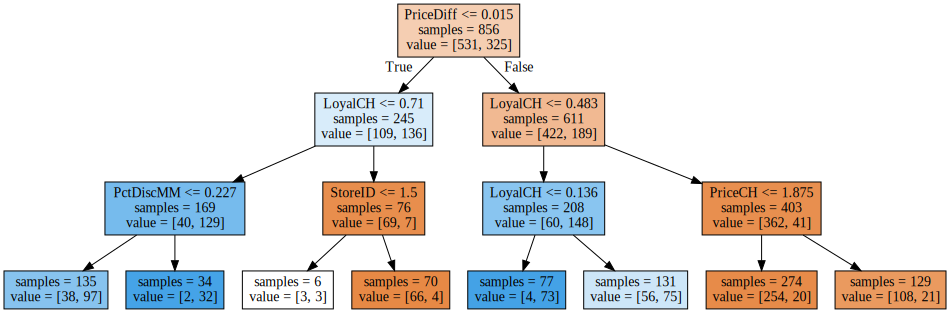

In [36]:
with open('arbolC.dot') as f:
    dot_graph=f.read()
graphviz.Source(dot_graph)

#### Evaluación

Métricas en test:
               precision    recall  f1-score   support

           0       0.88      0.75      0.81       122
           1       0.72      0.87      0.79        92

    accuracy                           0.80       214
   macro avg       0.80      0.81      0.80       214
weighted avg       0.81      0.80      0.80       214
 
ROC AUC = 0.808


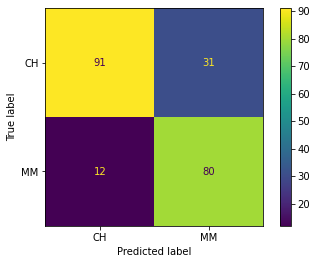

In [37]:
# TEST

# Obtenemos las predicciones del modelo sobre los datos de test
y_pred = modelo_arbolC.predict(X_test)

# Metricas
print('Métricas en test:\n',
      classification_report(y_test, y_pred),
      '\nROC AUC =', round(roc_auc_score(y_test, y_pred), 3))

# Matriz de confusion (0=CH, 1=MM)
plot_confusion_matrix(modelo_arbolC, X_test, y_test, display_labels = y.unique().tolist())

In [38]:
y_pred.shape

(214,)

#### Visualización

In [39]:
# Exportamos el arbol a archivo .dot
nombre_variables = X_train.columns.tolist()
export_graphviz(modelo_arbolC, out_file="treeC.dot", filled=True, feature_names=nombre_variables, rounded=True)

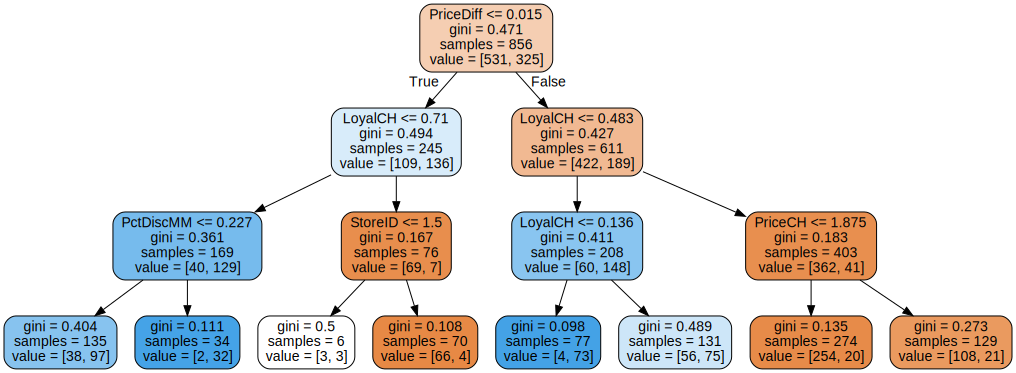

In [41]:
with open('treeC.dot') as f:
    dot_graph=f.read()
graphviz.Source(dot_graph)